In [ ]:
#---------------------------------------------------#
# PYTHON EXERCISES
# September 12, 2016 #
# EECS 445: Machine Learning #
# Author: Valliappa Chockalingam (valli@umich.edu) 
# --------------------------------------------------#

# Question 1: Numbers and Data Structures

* Example: If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

* ***Question: Find the sum of all the multiples of 3 or 5 below 1000 in 3 ways.***

- *Hint 1: * Loop through all the possible numbers, i.e., $x \in \mathbb{N} \wedge x < 1000$ and simply add up the multiples as you go through them. Use two loops first and then try making your code more concise.

- *Bonus: * Use the inclusion-exclusion principle. Write a function that calculates the sum of the first $n$ numbers in an arithmetic series. Hint: $S_n = \frac{n}{2}(u_1 + u_n) = \frac{n}{2}(2u_1 + (n - 1) \cdot d)$

In [ ]:
# 1. With Loops
# OK, not very "Pythonic"
def sum_of_multiples_with_loop(l, max_):
    total = 0
    # [1, 1000)
    for i in range(1, max_):
        for j in l:
            if i % j == 0:
                total += i
                break
    return total

# With Filter. 
# Better (At least more "Pythonic")
def sum_of_multiples_with_loop1(l, max_):
    return sum(filter(lambda k: any(k % i == 0 for i in l), list(range(max_))))

print (sum_of_multiples_with_loop([3, 5], 1000))
print (sum_of_multiples_with_loop1([3, 5], 1000))

# Question 2: Strings and Data Structures

Note: *You are free to use any functions and libraries that come with Python.* The aim is not to necessarily implement
code from scratch, but to get familiar with Python (specifically the syntax and data structures) and, to some extent, write concise readable working code.

* *** (a): Given a non-empty string like "Code" return a string like "CCoCodCode". ***



* *** (b): Given strings a, b and c, write a function that will replace all occurences of a in b with c. ***



* *** (c): Given a string s that has been Caeser enciphered with a numeric shift n. Return the deciphered string.*** 
For example, s = "vjku ku c eqfg" and n = -2, returns "this is a code" Note: You can assume the string is all in lowercase without any special characters.



* *** (d): Given a string s, return whether s is a palindrome, i.e, it is spelt the same when read from either direction. *** Note: Ignore case, special characters and spacing.



* *** (e): Using the higher order function filter(), define a function filter_long_words() that takes a list of words and an integer n and returns the list of words that are longer than n (in the same order). ***



* *** (f): Given a string s and a number n, return a list of size n consisting of tuples with two elements, the first being the correct string in the look-and-say-sequence and the second being a dictionary of character: count pairs that is sorted (Hint: Use Ordered Dictionaries and sorted()). *** For example, if s = "1" and n = 5, the look-and-say-sequence is as follows:

    ```
    1 ("1", {"1" : 1})
    11 ("11", {"1" : 2})
    21 ("21", {"1" : 1, "2" : 1})
    1211 ("1211", {"1" : 3, "2" : 1})
    111221 ("111221", {"1" : 4, "2" : 2})
    correct output: [("1", {"1" : 1}), ("11", {"1" : 2}), ("21", {"1" : 1, "2" : 1}), 
    ("1211", {"1" : 3, "2" : 1}), ("111221", {"1" : 4, "2" : 2})]```

In [64]:
# Implement part (a) below
def string_repeater(s):
    return ''.join([s[:i] for i in range(len(s) + 1)])

# Implement part (b) below
def string_occurence_remover(a, b, c):
    return b.replace(a, c)

# Implement part (c) below
def caeser_decipher(s, n):
    import string
    return s.translate(str.maketrans(string.ascii_lowercase, string.ascii_lowercase[n:] + string.ascii_lowercase[:n]))

def is_palindrome(s):
    s = ''.join(c for c in s if c.isalpha()).lower()
    return s == s[::-1]

def filter_long_words(l, n):
    return list(filter(lambda s: len(s) > n, l))

def look_and_say(s, n):
    from collections import OrderedDict
    from itertools import groupby, accumulate
    temp = [s for i in range(n)]
    strings = list(accumulate(temp, lambda s_, _: ''.join(str(len(list(g))) + k for k, g in groupby(s_))))
    dictionaries = [OrderedDict(sorted({c : strings[seq_index].count(c) 
                                        for c in list(set(strings[seq_index]))}.items())) 
                    for seq_index in range(len(strings))]
    return list(zip(strings, dictionaries))

In [67]:
# Simple Tests for part (a)
assert(string_repeater("Code") == "CCoCodCode")
assert(string_repeater("EECS445") == "EEEEECEECSEECS4EECS44EECS445")

# Simple Tests for part (b)
assert(string_occurence_remover("Boring", "PythonIsBoring", "Fun") == "PythonIsFun")
assert(string_occurence_remover("12", "Today is September 12 and 12 is my favorite number.", "9") == \
       "Today is September 9 and 9 is my favorite number.")

# Simple Tests for part (c)
assert(caeser_decipher("vjku ku eqfg", -2) == "this is code")
assert(caeser_decipher("h khjd bnlotsdqr", 1) == "i like computers")

# Simple Tests for part (d)
assert(is_palindrome("Rats live on no evil star."))
assert(is_palindrome("On a clover, if alive, erupts a vast pure evil; a fire volcano"))
assert(not is_palindrome("Hello, this is Jupyter Notebook speaking."))
assert(not is_palindrome("I am currently in a hands-on lecture."))

# Simple Tests for part (e)
assert(filter_long_words(['a', '', '0', 'a0', 'a0b02030', 'ee', 'cs', 'eecs', 'eeccss'], 2) == ['a0b02030', 'eecs', 'eeccss'])
assert(filter_long_words(['1', '2'], 0) == ['1', '2'])

# Simple Test for part (f)
from collections import OrderedDict
assert(look_and_say("aabbcc", 5) == [('aabbcc', OrderedDict([('a', 2), ('b', 2), ('c', 2)])),
 ('2a2b2c', OrderedDict([('2', 3), ('a', 1), ('b', 1), ('c', 1)])),
 ('121a121b121c',
  OrderedDict([('1', 6), ('2', 3), ('a', 1), ('b', 1), ('c', 1)])),
 ('1112111a1112111b1112111c',
  OrderedDict([('1', 18), ('2', 3), ('a', 1), ('b', 1), ('c', 1)])),
 ('3112311a3112311b3112311c',
  OrderedDict([('1', 12), ('2', 3), ('3', 6), ('a', 1), ('b', 1), ('c', 1)]))])

# Question 3: Classes and Interactive I/O

*** (a) Define a class which has at least two methods, getString: to get a string from console input and printString: to print the string in upper case. Also write a simple test to check the functionality class methods. ***

In [78]:
class StringUppercaseMaker(object):
    def __init__(self):
        curr_str = None
    
    def getString(self):
        self.x = input("Please enter a string.")
    
    def printString(self):
        print(self.x.upper())

test_object = StringUppercaseMaker()
test_object.getString()
test_object.printString()
test_object.printString()
test_object.getString()
test_object.printString()

Please enter a string.Hello
HELLO
HELLO
Please enter a string.Hi
HI


*** (b) Write a program able to play the "Guess the number"-game, where the number to be guessed is randomly chosen between 1 and 20.***

(Source: http://inventwithpython.com) This is how it should work when run in a terminal:

```
Hello! What is your name?
Valli
Well, Valli, I am thinking of a number between 1 and 20.
Take a guess.
10
Your guess is too low.
Take a guess.
15
Your guess is too low.
Take a guess.
18
Good job, Valli! You guessed my number in 3 guesses!
```

In [102]:
import random
class GuessTheNumber(object):
    # Create a constructor here (__init__ function) that takes two numbers, a minimum and a maximum for 
    # the range that guesses can take. Save these in variable min_guess and max_guess. Create and 
    # initialize a Boolean called incorrect to be true. (Note: Python booleans use capitalization, >T<rue or >F<alse)
    def __init__(self, min_guess, max_guess):
        self.min_guess = min_guess
        self.max_guess = max_guess
        self.incorrect = True
    
    def play(self):
        # Write code to get input from the user and save it into a string variable name.
        name = input("Hello! What is your name? ")
        print("Well, " + name + ", I am thinking of a number between " + 
              str(self.min_guess) + " and " + str(self.max_guess) + ".\n")
        answer = random.randrange(self.min_guess, self.max_guess + 1)
        # Write the main loop to collect guesses and check whether they are correct. Also remember to save the count!
        # Additionally, if the guess is out of range or input is unexpected (like type mismatch or non-numeric input), 
        # simply print an error message and break from the loop.
        count = 0
        while self.incorrect:
            x = int(input("Take a guess. "))
            if x == answer: 
                self.incorrect = False
                print("Good job, " + name + "! You guessed my number in " + str(count) + " guesses.")
            else:
                count += 1
                if x > answer:
                    print("Your guess is too high.\n")
                elif x < answer: 
                    print("Your guess is too low.\n")
        incorrect = True

In [106]:
# Test out your game!
g = GuessTheNumber(1, 20)
g.play()

Hello! What is your name? Anonymous
Well, Anonymous, I am thinking of a number between 1 and 20.

Take a guess. 10
Your guess is too high.

Take a guess. 5
Your guess is too low.

Take a guess. 7
Good job, Anonymous! You guessed my number in 2 guesses.


# Question 4: Pandas and Data Exploration

In [6]:
# Generate some Data for analysis
from sklearn.datasets import make_classification
X, y = make_classification(1000, n_features=5, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)

In [7]:
# (a) Get a glimpse of the data by making a Pandas DataFrame from the data and then printing the first few and last
# few rows.
import pandas as pd
import numpy as np

df = pd.DataFrame(np.hstack((X, y[:, None])))
print("First few rows: ")
print(df.head())

print("Last few rows: ")
print(df.tail())

First few rows: 
          0         1         2         3         4    5
0 -0.744656 -1.002108 -0.229806  0.834371  0.250114  0.0
1  1.798666 -0.022413  1.666616  0.980480 -0.404352  1.0
2 -0.940481 -1.219292 -0.311325  0.996956 -2.005125  0.0
3  0.567027  0.260004  0.403881 -0.018421 -1.033165  1.0
4  1.352852 -0.507426  1.476739  1.339058 -1.572796  1.0
Last few rows: 
            0         1         2         3         4    5
995  1.290408 -0.480536  1.407000  1.272998 -0.950518  1.0
996  1.502635  2.975858  0.029783 -2.853239 -1.774745  1.0
997  0.377319 -0.408477  0.533336  0.700845 -1.171190  1.0
998  1.634704 -1.307860  2.100499  2.469990  1.274045  1.0
999 -1.272671 -1.354099 -0.555906  0.986270 -0.575256  0.0


/Users/Valli/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


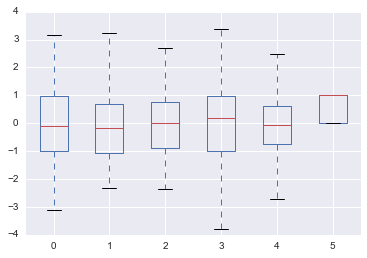

In [8]:
# (b) Plot a boxplot of each column to visualize the distribution of the data column values. 
%matplotlib inline
ax = df.boxplot()

In [9]:
# (c) Try using the describe() function of the DataFrame.
df.describe()

,0,1,2,3,4,5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.026570,-0.035264,-0.008423,0.029168,-0.052110,0.501000
std,1.182997,1.166586,1.015775,1.327471,0.954592,0.500249
min,-3.107342,-2.339154,-2.346431,-3.806020,-3.116857,0.000000
25%,-1.000162,-1.058573,-0.879891,-1.006694,-0.735595,0.000000
50%,-0.100546,-0.157854,0.003162,0.185798,-0.050095,1.000000
75%,0.975560,0.686004,0.748515,0.987554,0.600995,1.000000
max,3.172533,3.646599,2.677722,3.378403,2.929096,1.000000


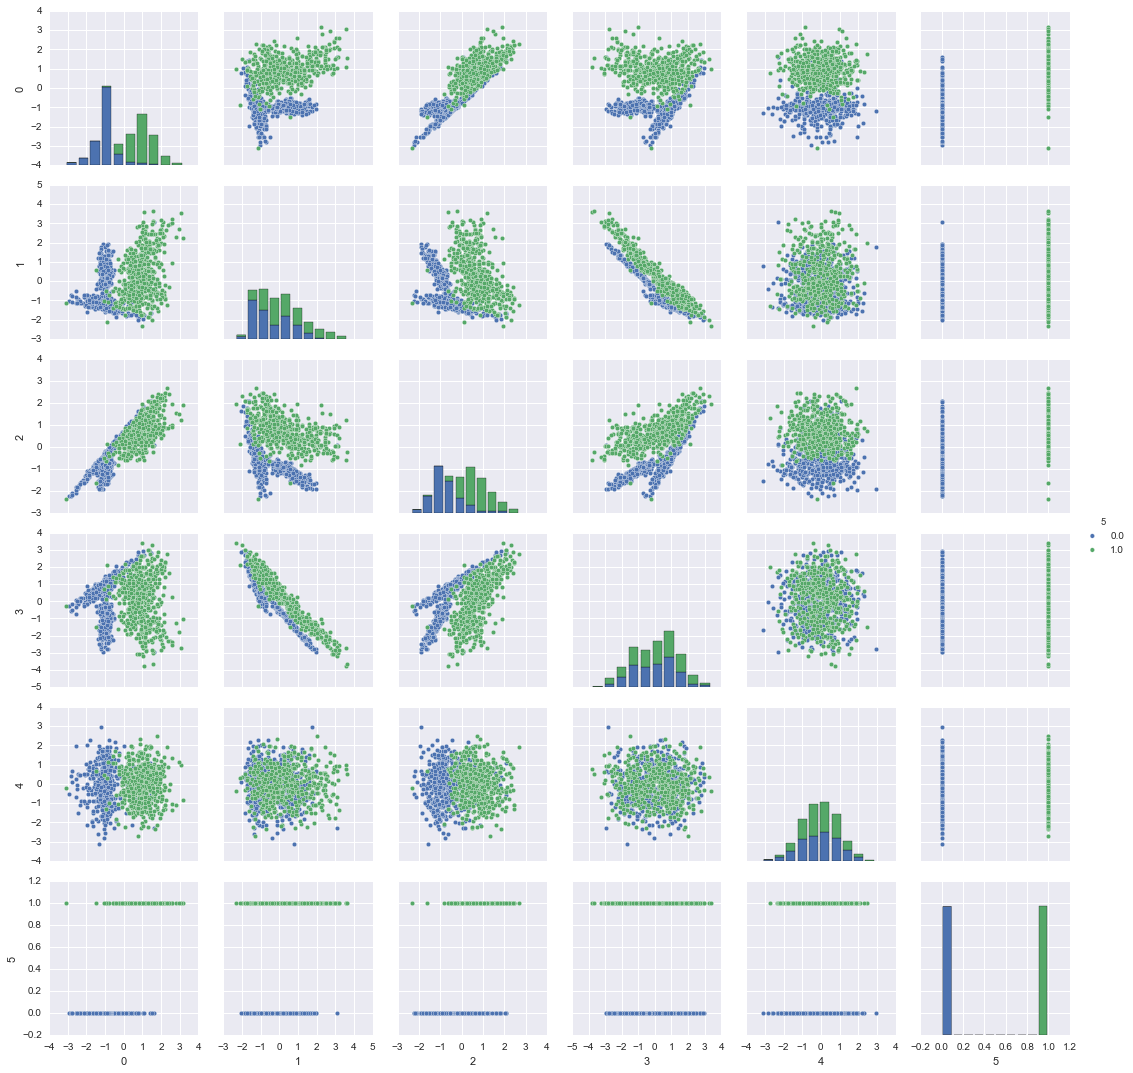

In [12]:
# (d) Install Seaborn if it is not already installed and import it below. Then, perform a pairwise plot using the data. 
import seaborn as sns
sns.pairplot(df, hue=5)

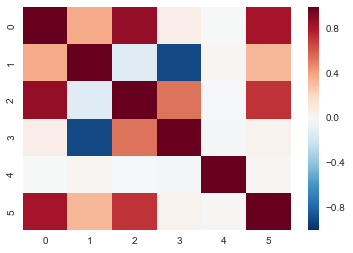

In [18]:
# (e) Now try Seaborn's correlation plot (Heatmap).
sns.heatmap(df.corr())

In [40]:
# (Optional) Using the first 70% of the data as a training set and the last 30% as a test set, construct a classifier
# and see how well it performs. You will be certainly able to do this at the end of the course!
train_test_split = int(len(df) * 0.7)

train_df = df[:train_test_split]
train_X = train_df[train_df.columns[:-1]]
train_y = train_df[train_df.columns[-1]]

test_df  = df[train_test_split:]
test_X = test_df[train_df.columns[:-1]]
test_y = test_df[train_df.columns[-1]]

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge', penalty='l2')

clf.fit(train_X, train_y)
y_train_pred = clf.predict(train_X)
print("Training Accuracy: " + str(sum(i == j for i, j in zip(list(train_y), list(y_train_pred))) / len(train_y)))

y_test_pred = clf.predict(test_X)
print("Test Accuracy: " + str(sum(i == j for i, j in zip(list(test_y), list(y_test_pred))) / len(test_y)))

Training Accuracy: 0.944285714286
Test Accuracy: 0.926666666667


# Question 5: Numpy Exercises 

In [385]:
# (a) Write a function that takes in a tuple and a string that can either 
# be 'zero', 'one' or 'gaussian' and correspondingly return a NumPy array that contains those elements. For 'gaussian', 
# assume sampling with mean = 0, std = 1.
def array_with_shape(shape, type_):
    if type_ == 'zero':
        return np.zeros(shape)
    elif type_ == 'one':
        return np.ones(shape)
    elif type_ == 'gaussian':
        return np.random.standard_normal(shape)
    else:
        raise NotImplementedError
        
print(array_with_shape((3, 10), 'zero'))
print(array_with_shape((5, 2, 3), 'one'))
print(array_with_shape((3, 3), 'gaussian'))
print(array_with_shape((4, 4, 1), 'uniform'))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[[ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]]]
[[ 1.42420629  0.03745411  2.07203795]
 [ 0.5928345  -0.33875083  0.7768265 ]
 [-0.38344065 -1.03579055 -0.28423047]]


NotImplementedError: 

In [389]:
# (b) Write a function that returns a n x n identity matrix with n as a parameter.
def identity(n):
    return np.eye(n)

print(identity(1))
print(identity(5))
print(identity(5) * 3.1415926535)

[[ 1.]]
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
[[ 3.14159265  0.          0.          0.          0.        ]
 [ 0.          3.14159265  0.          0.          0.        ]
 [ 0.          0.          3.14159265  0.          0.        ]
 [ 0.          0.          0.          3.14159265  0.        ]
 [ 0.          0.          0.          0.          3.14159265]]


In [400]:
# (c) Write a function that normalizes a matrix to [0, 1] and returns the normalized matrix.
def normalizer(arr):
    return arr if arr.max() == arr.min() else (arr - arr.min()) / (arr.max() - arr.min())

print(normalizer(array_with_shape((5, 5), 'one'))) # Note: Without the if/else, this returns an array of nan's. Try it!
print(normalizer(array_with_shape((3, 2, 3), 'gaussian')))

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[[ 0.67485502  0.89618789  0.33424507]
  [ 0.50204285  0.46854452  0.86743627]]

 [[ 0.46105389  0.25583353  0.26624085]
  [ 1.          0.56813732  0.4275101 ]]

 [[ 0.          0.4454402   0.63184115]
  [ 0.49166951  0.34849142  0.40069063]]]


In [75]:
# (d) Write code that creates a NumPy array and makes it immutable.
def make_immutable(arr):
    arr.flags.writeable = False
    
arr = np.array([0, 0, 0])
make_immutable(arr)
arr[0] = 1

ValueError: assignment destination is read-only

In [407]:
# (e) Write a function that finds the closest value to a given scalar s.
def closest_element(arr, scalar):
    return arr[np.abs(arr - scalar).argmin()]

print(closest_element(np.array([-10, 0, 10]), 40))
print(closest_element(np.array([-10, 0, 10]), -40))
print(closest_element(np.array([-10, 0, 10]), 0))
print(closest_element(np.array([-10, 0, 10]), 5.5))
print(closest_element(np.array([-10, 0, 10]), -5.5))
print(closest_element(np.array([-10, 0, 10]), 3.5))
print(closest_element(np.array([-10, 0, 10]), -3.5))

10
-10
0
10
-10
0
0


In [411]:
# (f) Write a function that subtracts the mean of each row from a matrix and returns it.
def subtract_row_means(arr):
    return arr - arr.mean(axis=1, keepdims=True)

print(subtract_row_means(np.array([[2, 2], [-1, 1]])))
print(subtract_row_means(np.array([[1.3, 2.4, 5.6], [5.6, 7.8, 8.9]])))

[[ 0.  0.]
 [-1.  1.]]
[[-1.8        -0.7         2.5       ]
 [-1.83333333  0.36666667  1.46666667]]


In [414]:
# (g) Write a function that sorts an array by the nth column and returns the sorted array.
def sort_by_column(arr, n):
    return arr[arr[:, n].argsort()]
print(sort_by_column(np.array([[-1, 5, 3], [7, 10, -1], [-1, -2, -5]]), 0))
print(sort_by_column(np.array([[-1, 5, 3], [7, 10, -1], [-1, -2, -5]]), 1))
print(sort_by_column(np.array([[-1, 5, 3], [7, 10, -1], [-1, -2, -5]]), 2))

[[-1  5  3]
 [-1 -2 -5]
 [ 7 10 -1]]
[[-1 -2 -5]
 [-1  5  3]
 [ 7 10 -1]]
[[-1 -2 -5]
 [ 7 10 -1]
 [-1  5  3]]


# Question 6: Numpy + First ML algorithm!

In [3]:
# (a) Write a function that implements Ordinary Least Squares given an input matrix X and a vector of targets y. 
# We will go over the method in the forthcoming lecture, but the equation is given in 
# https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods 
# Note: Use NumPy here, but do NOT make use of library functions that do this for you.

In [290]:
def OLS(X_, y_):
    return np.dot(np.linalg.inv(np.dot(X_.T, X_)), np.dot(X_.T, y_))

In [370]:
from sklearn.datasets import make_regression
X, y = make_regression(1000, n_features=1, noise=20, random_state=0)

In [371]:
# (b) Run your function on the above data and plot the data as well as the decision boundary (trendline) 
# generated by your classifer using matplotlib.

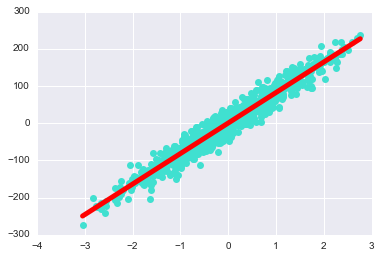

In [378]:
beta1, beta2 = OLS(np.concatenate((np.ones((len(X), 1)), X.reshape((len(X), 1))), axis=1), y)

from matplotlib import pyplot as plt
plt.plot(X, y, 'o', color='turquoise', linewidth=5)

space = np.linspace(min(X), max(X))
plt.plot(space, (beta1 + beta2 * space).squeeze(), 'r-', linewidth=5)